## 🎯 What is ANOVA?

* ANOVA = Analysis of Variance

* It is used to test whether 3 or more group means are different.

* Null Hypothesis (H₀):

      All group means are equal. μ1 = μ2 = μ3 = .........

* Alternative Hypothesis (H₁):

       At least one group mean is different.

#### ⭐ When do we use ANOVA?

* When you compare 3+ groups.

      Example: Marks of students taught by 3 different teachers — are their mean scores same or different?

#### ⭐ Types of ANOVA
1) One-way ANOVA

* One independent variable (factor) with 3+ groups.
* ✔ Teacher → 3 groups
* ✔ Diet types → 4 groups

2) Two-way ANOVA

* Two independent variables
* ✔ Gender (M/F)
* ✔ Diet type (A/B/C)

### One-way ANOVA — Manual Step-by-Step Calculation
Assume 3 groups:
| Group | Scores   |
| ----- | -------- |
| A     | 8, 9, 6  |
| B     | 5, 4, 7  |
| C     | 10, 9, 8 |
#### STEP 1: Calculate group means
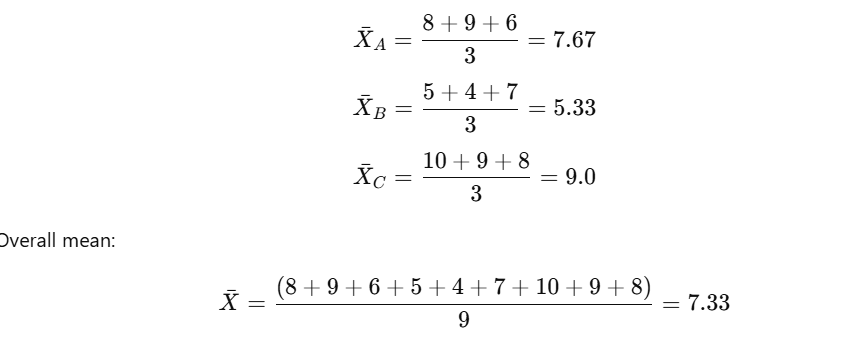
#### STEP 2: Between-Group Sum of Squares (SSB)
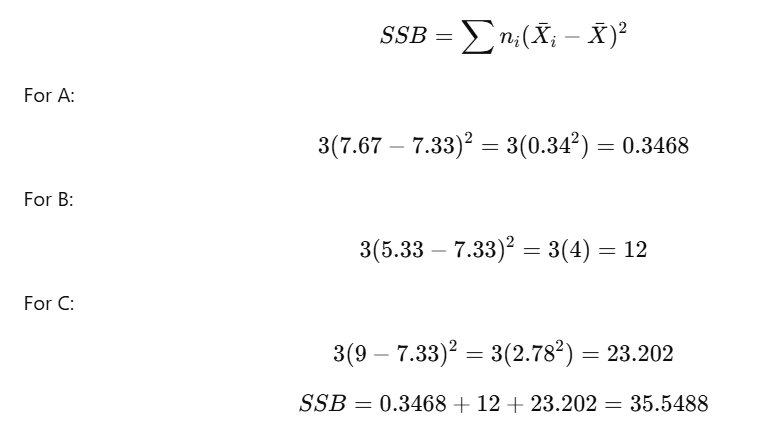
#### STEP 3: Within-Group Sum of Squares (SSW)
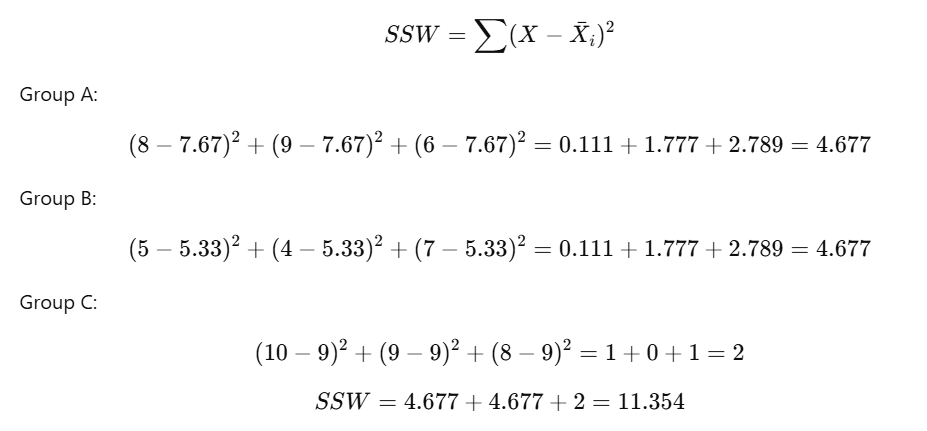
#### STEP 4: Degrees of Freedom
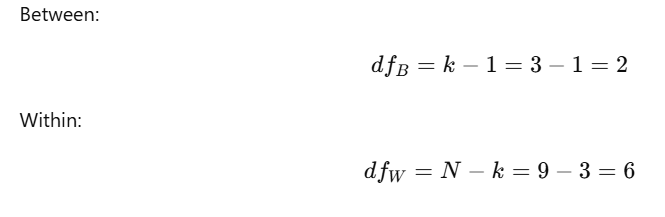
#### STEP 5: Find Mean Squares
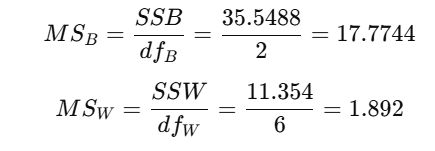
#### STEP 6: Compute F-statistic
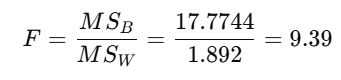
#### STEP 7: Compare with Critical Value
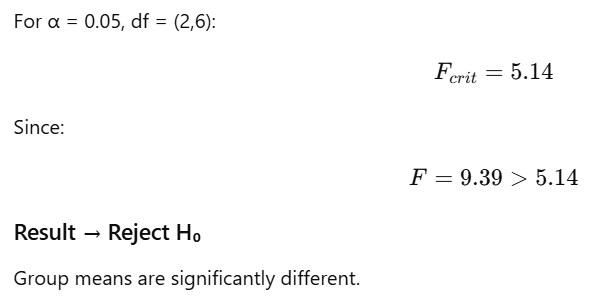

| Source  | SS      | df | MS      | F    |
| ------- | ------- | -- | ------- | ---- |
| Between | 35.5488 | 2  | 17.7744 | 9.39 |
| Within  | 11.354  | 6  | 1.892   | —    |
| Total   | 46.90   | 8  | —       | —    |


In [6]:
#Manually
import numpy as np
from scipy.stats import f

# ------------------------------
# Example Data
A = np.array([8, 9, 6])
B = np.array([5, 4, 7])
C = np.array([10, 9, 8])
groups = [A, B, C]
alpha = 0.05
# ------------------------------

# group sizes and means
n = [len(g) for g in groups]
means = [np.mean(g) for g in groups]
N = sum(n)
k = len(groups)

overall_mean = np.mean(np.concatenate(groups))

# SSB
SSB = sum(n[i] * (means[i] - overall_mean)**2 for i in range(k))

# SSW
SSW = sum(((groups[i] - means[i])**2).sum() for i in range(k))

dfB = k - 1
dfW = N - k

MSB = SSB / dfB
MSW = SSW / dfW

F_stat = MSB / MSW

p_value = 1 - f.cdf(F_stat, dfB, dfW)
F_critical = f.ppf(1 - alpha, dfB, dfW)

print("SSB =", SSB)
print("SSW =", SSW)
print("MSB =", MSB)
print("MSW =", MSW)
print("F =", F_stat)
print("p-value =", p_value)
print("F-critical =", F_critical)
print("Decision:", "Reject H0" if F_stat > F_critical else "Fail to Reject H0")


SSB = 20.66666666666667
SSW = 11.333333333333332
MSB = 10.333333333333336
MSW = 1.8888888888888886
F = 5.4705882352941195
p-value = 0.04442455150462965
F-critical = 5.143252849784718
Decision: Reject H0


In [7]:
# Anova using stats
import numpy as np
from scipy import stats

north = [10, 12, 9, 11]
south = [8, 9, 7, 10]
east = [13, 15, 14, 16]

f_stat, p_value = stats.f_oneway(north, south, east)

print("F-Statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H₀ → At least one region's sales differ.")
else:
    print("Fail to Reject H₀ → No significant difference in sales.")


F-Statistic: 22.399999999999995
p-value: 0.0003203104089926066
Reject H₀ → At least one region's sales differ.


In [5]:
import numpy as np
from scipy.stats import f_oneway, f

# --------------------
# Example data
A = np.array([8, 9, 6])
B = np.array([5, 4, 7])
C = np.array([10, 9, 8])
alpha = 0.05
# --------------------

# -------- ANOVA using stats --------
F_stat, p_value = f_oneway(A, B, C)

# Degrees of freedom
k = 3  # number of groups
N = len(A) + len(B) + len(C)

df_between = k - 1
df_within  = N - k

# Critical F-value
F_critical = f.ppf(1 - alpha, df_between, df_within)

# Decision
decision = "Reject H0" if F_stat > F_critical else "Fail to Reject H0"

print("F-statistic:", F_stat)
print("p-value:", p_value)
print("F-critical:", F_critical)
print("Decision:", decision)


F-statistic: 5.470588235294121
p-value: 0.044424551504629574
F-critical: 5.143252849784718
Decision: Reject H0


#### 🔍 Why use scipy.stats.f_oneway()?

* It automatically performs:
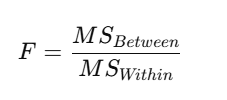
* without manually calculating SSB, SSW, MSB, MSW.